In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("imputed_df.csv")

In [2]:
result = df.groupby('Segment')['Power (kW)'].mean()
percentages = (result / result.sum())*100
percentages

Segment
Academic       8.998594
Government    24.876856
Industry      11.521796
Others        10.888431
Research      36.229703
Vendor         7.484620
Name: Power (kW), dtype: float64

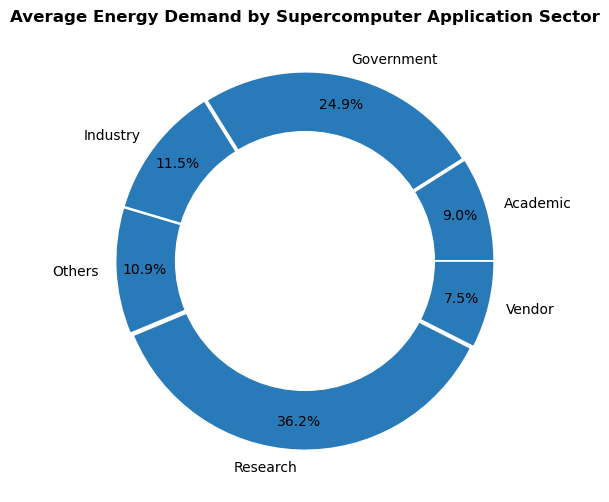

In [2]:
result = df.groupby('Segment')['Power (kW)'].mean()
percentages = (result / result.sum())*100
names = result.index
size = percentages
plt.figure(figsize=(8,6))
my_circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['#287AB8']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
plt.pie(size, labels=names, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Average Energy Demand by Supercomputer Application Sector", fontweight='bold')
plt.show()

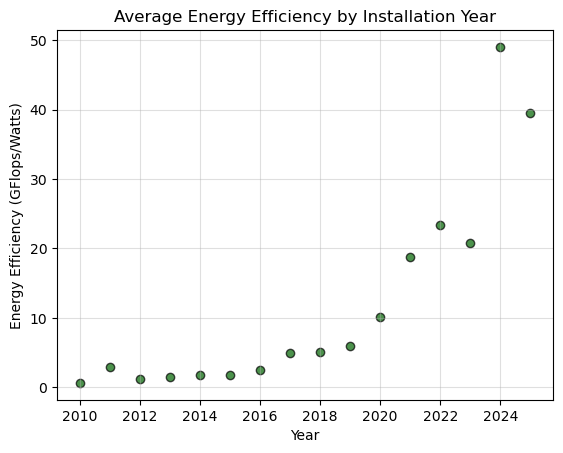

In [4]:
avg_energy_efficiency_per_year = df.groupby('Year')['Energy Efficiency [GFlops/Watts]'].mean()

plt.scatter(avg_energy_efficiency_per_year.index,avg_energy_efficiency_per_year.values,color='darkgreen',alpha=0.7, edgecolors='black')

plt.xlabel('Year')
plt.ylabel('Energy Efficiency (GFlops/Watts)')
plt.title('Average Energy Efficiency by Installation Year')
plt.grid(alpha=0.4)
plt.show()

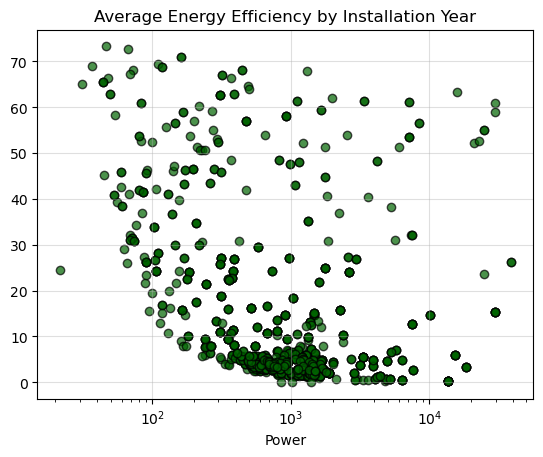

In [27]:
plt.scatter(df["Power (kW)"],df["Energy Efficiency [GFlops/Watts]"], color='darkgreen',alpha=0.7, edgecolors='black')
plt.title('Trends in Increase of Power with Energy Efficiency')
plt.grid(alpha=0.4)
plt.xscale('log')
plt.xlabel("Power")
plt.ylabel("Energy Efficiency (GFlops/Watts")
plt.show()

ValueError: Mutually exclusive regression options.

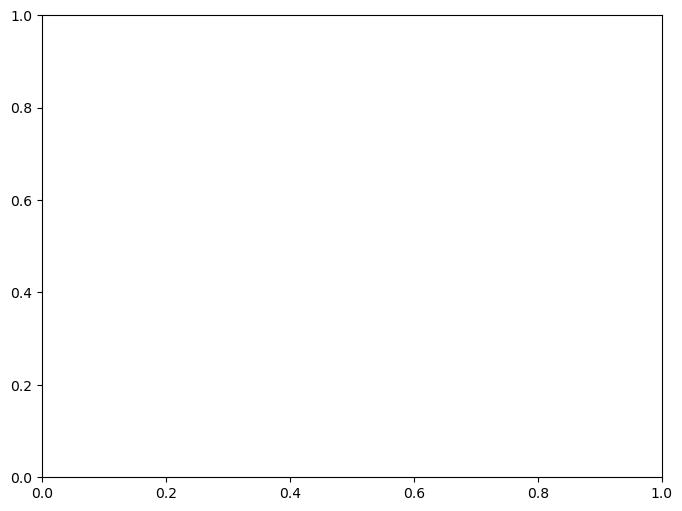

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=df, x="Power (kW)", y="Energy Efficiency [GFlops/Watts]", 
            logx=True, ci=None, order=2)  # Try order=2 or order=3
ax.set_xscale("log")
plt.show()

ModuleNotFoundError: No module named 'statsmodels.nonparametric.lowess'

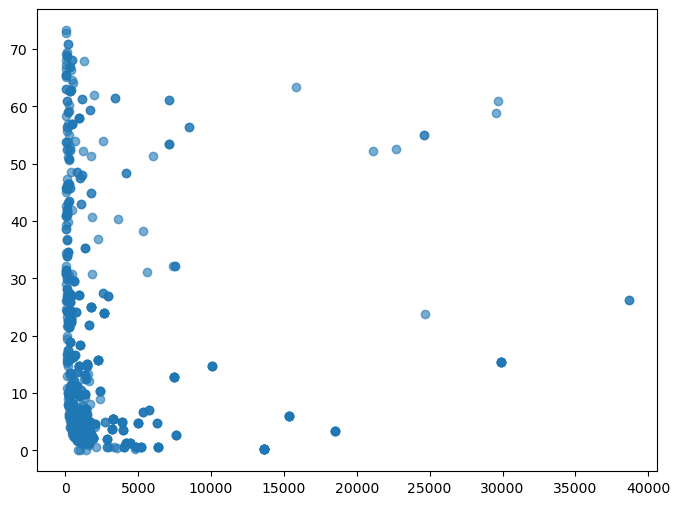

In [43]:
from scipy.signal import savgol_filter
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

# Sort data for smooth line
sorted_data = df.sort_values("Power (kW)")
x = sorted_data["Power (kW)"]
y = sorted_data["Energy Efficiency [GFlops/Watts]"]

# Plot scatter
ax.scatter(x, y, alpha=0.6)

# Add LOWESS smooth line
from statsmodels.nonparametric.lowess import lowess
smoothed = lowess(y, np.log10(x), frac=0.2)
ax.plot(10**smoothed[:, 0], smoothed[:, 1], 'r-', linewidth=2)

ax.set_xscale("log")
ax.set_xlabel("Power (kW)")
ax.set_ylabel("Energy Efficiency [GFlops/Watts]")
plt.show()

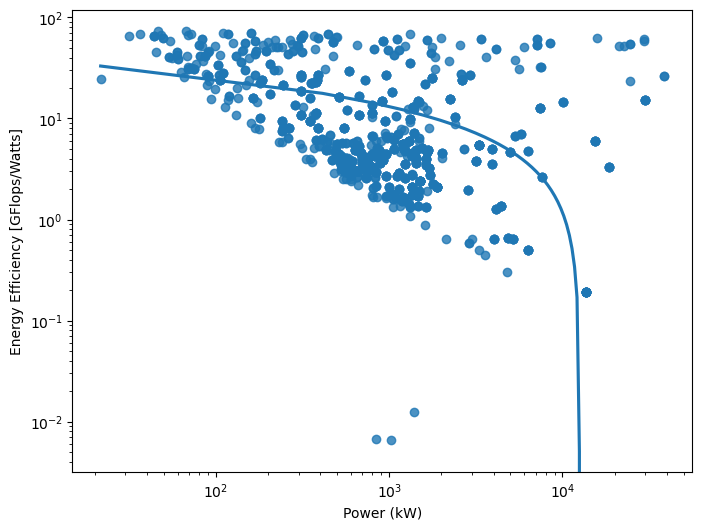

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=df, x="Power (kW)", y="Energy Efficiency [GFlops/Watts]", 
            logx=True,  ci=None)
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

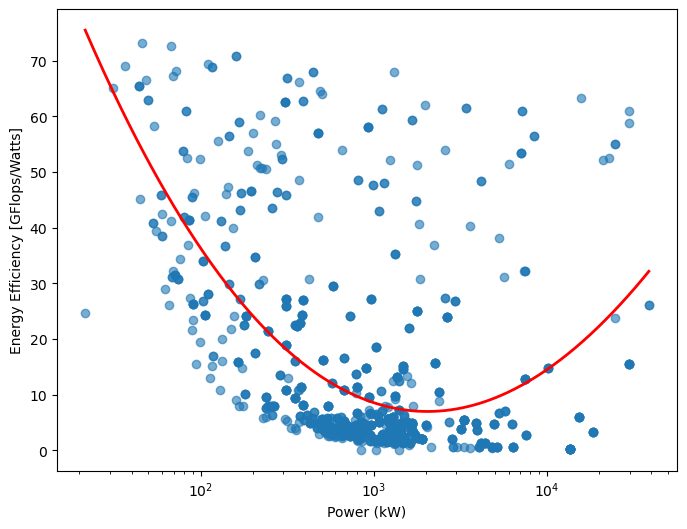

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(df["Power (kW)"], df["Energy Efficiency [GFlops/Watts]"], alpha=0.6)

# Fit polynomial on log(x)
log_x = np.log10(df["Power (kW)"]).values.reshape(-1, 1)
y = df["Energy Efficiency [GFlops/Watts]"].values

poly = PolynomialFeatures(degree=3)
log_x_poly = poly.fit_transform(log_x)
model = LinearRegression().fit(log_x_poly, y)

# Create smooth prediction line
x_range = np.logspace(np.log10(df["Power (kW)"].min()), 
                       np.log10(df["Power (kW)"].max()), 300)
log_x_range = np.log10(x_range).reshape(-1, 1)
log_x_range_poly = poly.transform(log_x_range)
y_pred = model.predict(log_x_range_poly)

ax.plot(x_range, y_pred, 'r-', linewidth=2)
ax.set_xscale("log")
ax.set_xlabel("Power (kW)")
ax.set_ylabel("Energy Efficiency [GFlops/Watts]")
plt.show()